# 1. Imports

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from s4hci.models.noise import S4Noise
from s4hci.utils.data_handling import read_s4hci_root_dir

# 2. Load S4 noise model

In [2]:
root_dir = Path(read_s4hci_root_dir())
noise_model_file1 = root_dir / Path("70_results/x1_fake_planet_experiments/HD22049_351_096_C-0679_A_/scratch/tensorboard_S4/models/noise_model_0000_lambda_010000.pkl")
noise_model_file2 = root_dir / Path("70_results/x1_fake_planet_experiments/HD40136_333_1101_C-0092_C_/scratch/tensorboard_S4/models/noise_model_0000_lambda_001000.pkl")

Data in the S4HCI_ROOT_DIR found. Location: /fast/mbonse/s4


In [4]:
s4_noise_model_1 = S4Noise.load(noise_model_file1)
s4_noise_model_2 = S4Noise.load(noise_model_file2)

# 3. Get input gradients / Saliency Map

In [5]:
s4_noise_model_1.compute_betas()
input_gradients1 = np.abs(s4_noise_model_1.betas.detach().numpy())
input_gradients1 = input_gradients1.reshape(-1, 91, 91)

In [6]:
s4_noise_model_2.compute_betas()
input_gradients2 = np.abs(s4_noise_model_2.betas.detach().numpy())
input_gradients2 = input_gradients2.reshape(-1, 91, 91)

# 4. Plot the result

In [7]:
def plot_saliency_map(
    axis_in,
    input_gradients,
    position):
    
    idx = position[0] * 91 + position[1]
    axis_in.imshow(input_gradients[idx])
    axis_in.axis("off")
    
    #len_markers = 3
    #axis_in.vlines(position[1], ymin=-0.5, ymax=-0.5 + len_markers, lw=2, color="white")
    #axis_in.vlines(position[1], ymin=90.5 - len_markers, ymax=90.5, lw=2, color="white")
    #axis_in.hlines(position[0], xmin=-0.5, xmax=-0.5 + len_markers, lw=2, color="white")
    #axis_in.hlines(position[0], xmin=90.5 - len_markers, xmax=90.5, lw=2, color="white")
    
    axis_in.scatter(position[1], position[0], color="white", marker="+", s=50)
    axis_in.scatter(45, 45, color="red", marker="*", s=50)

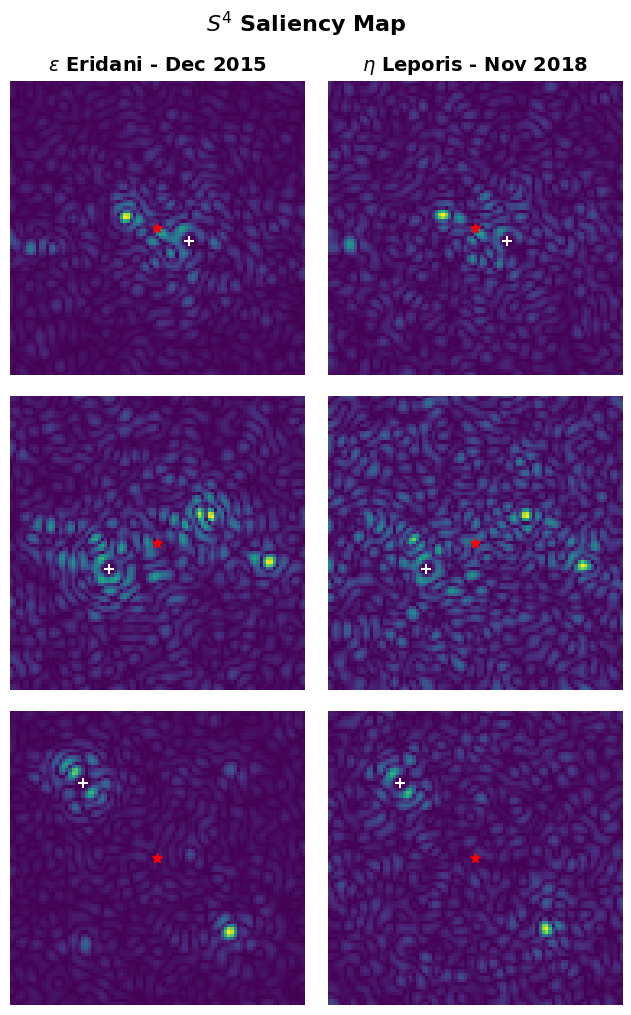

In [8]:
position1 = (49, 55)
position2 = (53, 30)
position3 = (22, 22)

# 1.) Create the Plot Layout ------------------------------
fig = plt.figure(
    constrained_layout=False,
    figsize=(8, 12))

gs0 = fig.add_gridspec(3, 2, width_ratios = [1, 1])
gs0.update(wspace=0.05, hspace=0.07)

# Residual Plots
example_1a = fig.add_subplot(gs0[0, 0])
example_2a = fig.add_subplot(gs0[1, 0])
example_3a = fig.add_subplot(gs0[2, 0])
example_1b = fig.add_subplot(gs0[0, 1])
example_2b = fig.add_subplot(gs0[1, 1])
example_3b = fig.add_subplot(gs0[2, 1])

plot_saliency_map(example_1a, input_gradients1, position1)
plot_saliency_map(example_2a, input_gradients1, position2)
plot_saliency_map(example_3a, input_gradients1, position3)
plot_saliency_map(example_1b, input_gradients2, position1)
plot_saliency_map(example_2b, input_gradients2, position2)
plot_saliency_map(example_3b, input_gradients2, position3)

# Add Figure Title
example_1a.set_title(
    "$\epsilon$ Eridani - Dec 2015",
    fontsize=14,
    fontweight="bold",
    y=1.01)

example_1b.set_title(
    "$\eta$ Leporis - Nov 2018",
    fontsize=14,
    fontweight="bold",
    y=1.01)

fig_title = fig.suptitle(
    "$S^4$ Saliency Map",
    size=16, fontweight="bold", y=0.94)


fig.patch.set_facecolor('white')
plt.savefig("./final_plots/04_s4_sailency_map.pdf",
            bbox_inches='tight')